In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
face_cascade = cv2.CascadeClassifier('F:/dd/Library/etc/haarcascades/haarcascade_frontalface_alt2.xml')

recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read("male.yml")

labels = {"person_name": 1}
with open("labels.pickle", 'rb') as f:
    og_labels = pickle.load(f)
    labels = {v:k for k,v in og_labels.items()}

4
tom-hanks


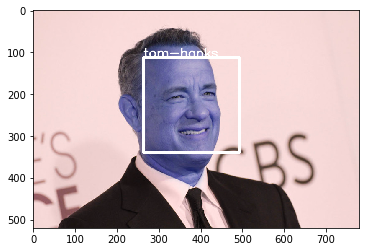

In [3]:
frame = cv2.imread('C:/Users/Faiz Khan/Desktop/ddd/images2/Tom hanks/2.jpg')

gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.5, minNeighbors=5)
for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        id_, conf = recognizer.predict(roi_gray)
        if conf>=45 and conf <=85:
            print(id_)
            print(labels[id_])
            font = cv2.FONT_HERSHEY_SIMPLEX
            name = labels[id_]
            color = (255, 255, 255)
            cv2.putText(frame, name, (x,y), font, 1, color, 2, cv2.LINE_AA)
        img_item = "my-image.png"
        cv2.imwrite(img_item, roi_color)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,255,255),5)
        print(id_)
        print(labels[id_])
        font = cv2.FONT_HERSHEY_SIMPLEX
        name = labels[id_]
        color = (255, 255, 255)
        cv2.putText(frame, name, (x,y), font, 1, color, 2, cv2.LINE_AA)
plt.imshow(frame)